In [5]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import requests

In [11]:
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv")
df.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


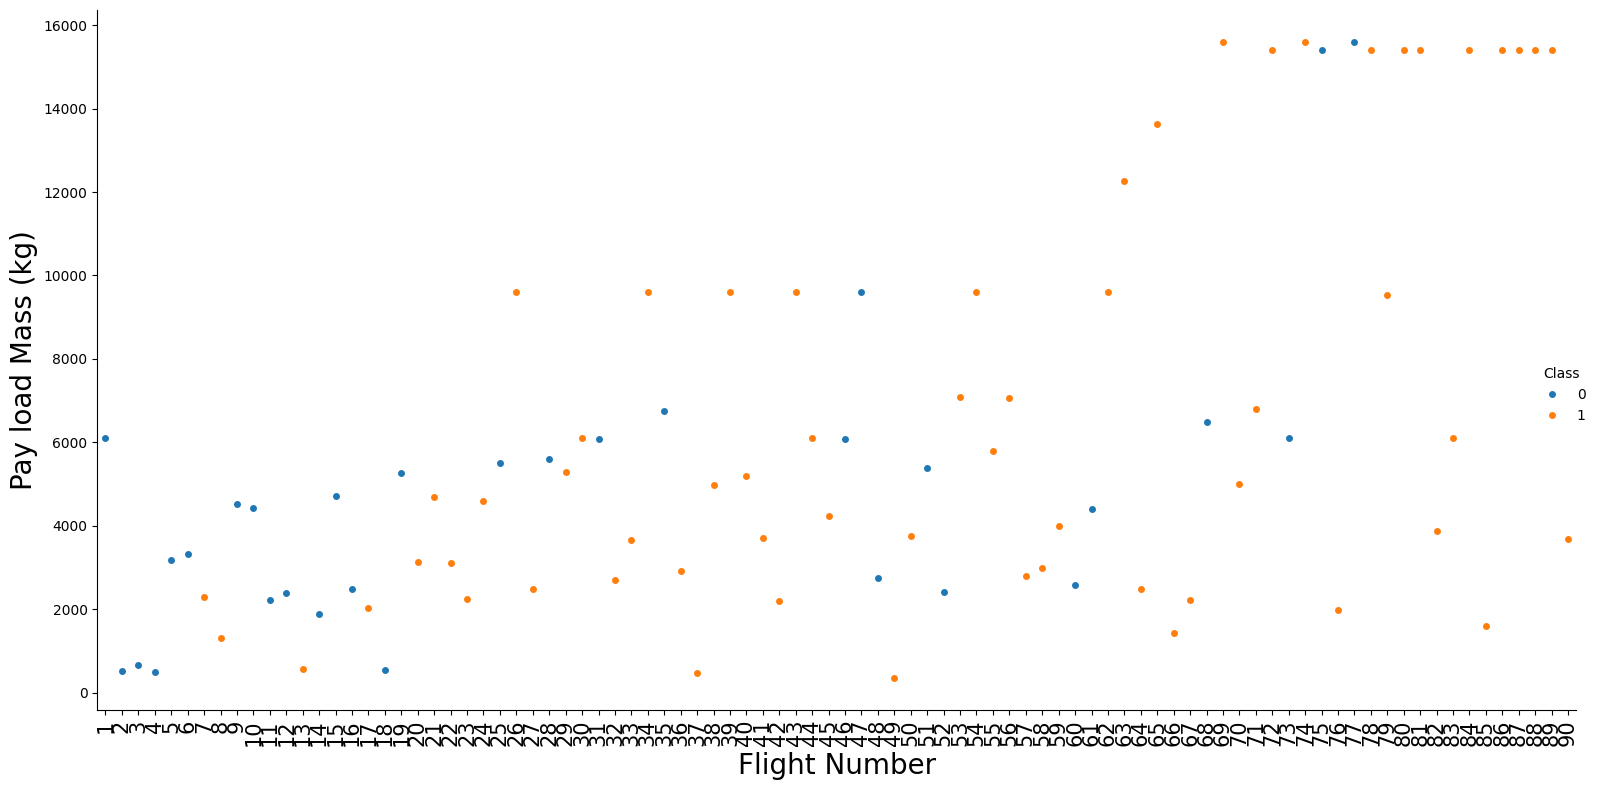

In [27]:
# Plot FlightNumber against PayloadMass and overlay the outcome
sns.catplot(y='PayloadMass', x='FlightNumber', hue='Class', data=df)
plt.xlabel('Flight Number', fontsize=20)
plt.ylabel('Pay load Mass (kg)', fontsize=20)
plt.xticks(rotation=90)
plt.gcf().set_size_inches(16, 8)
plt.tick_params(axis='x', which='major', labelsize=15)
plt.tight_layout()
plt.show()

### TASK 1: Visualize the relationship between Flight Number and Launch Site

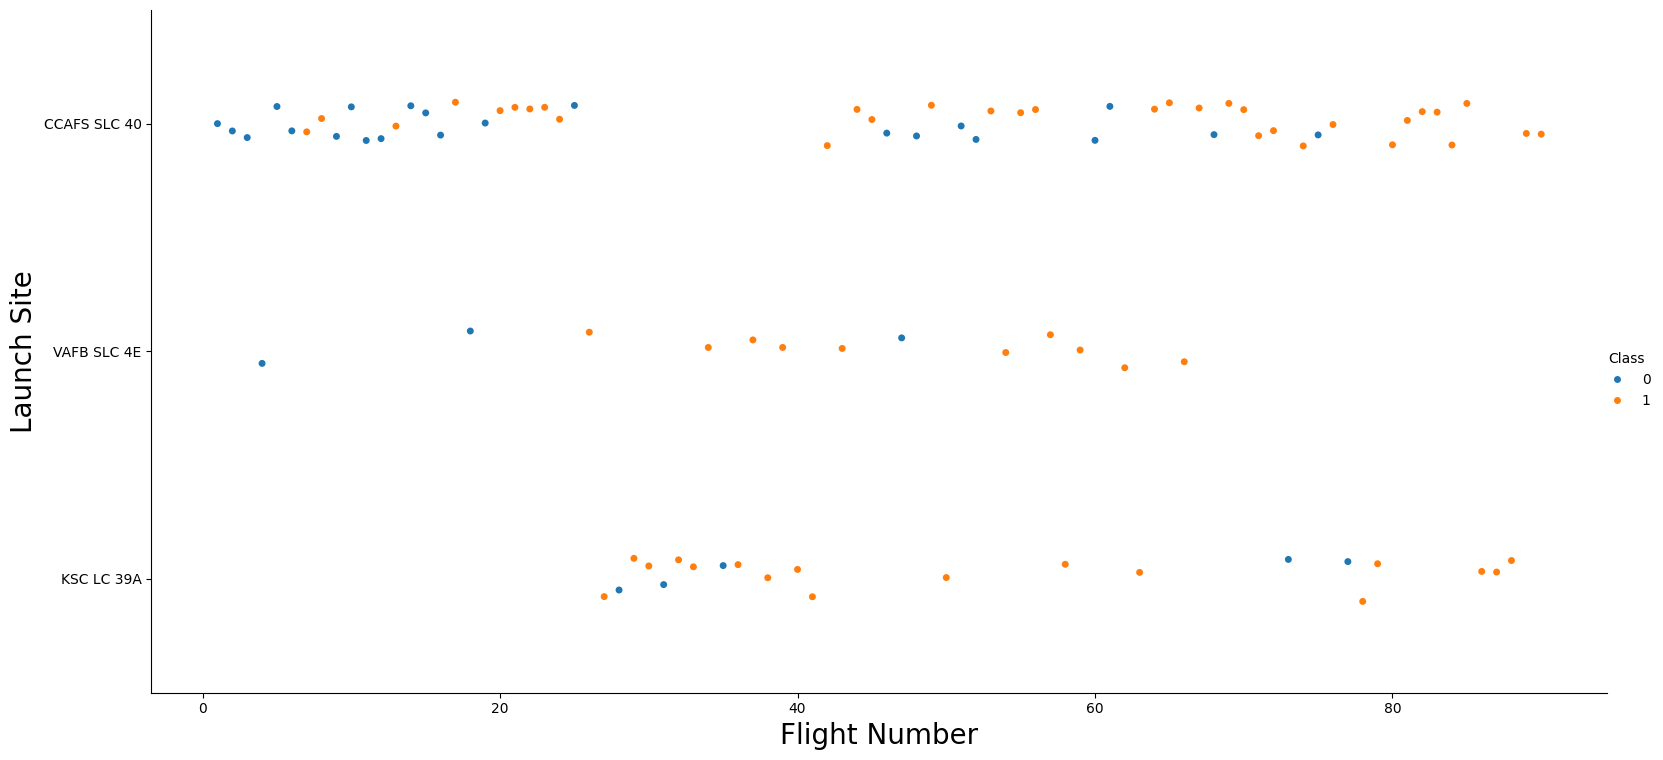

In [29]:
sns.catplot(data=df, y='LaunchSite', x='FlightNumber', hue='Class', aspect=5)
plt.xlabel('Flight Number', fontsize=20)
plt.ylabel('Launch Site', fontsize=20)
plt.gcf().set_size_inches(16, 8)
plt.show()

### Task 2 - Visualize the relationship between Payload and Launch Site

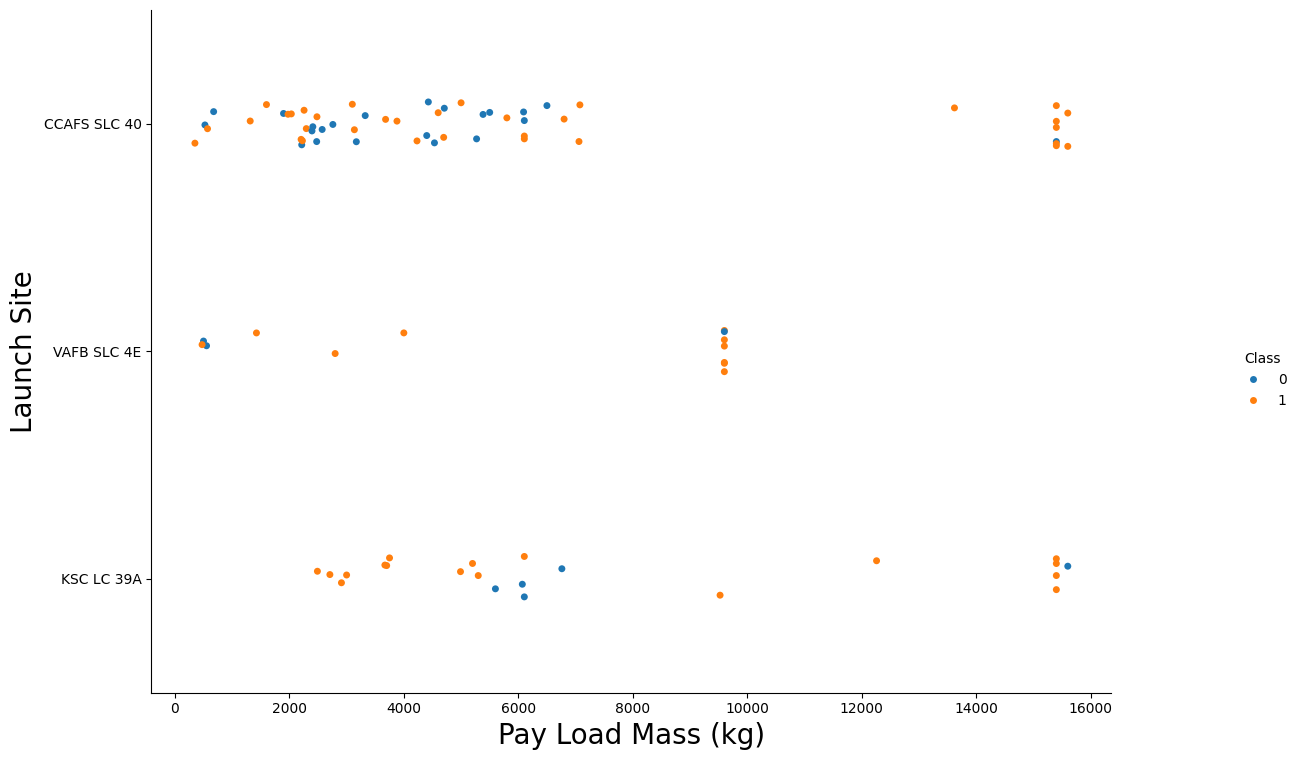

In [30]:
sns.catplot(data=df, y='LaunchSite', x='PayloadMass', hue='Class')
plt.xlabel('Pay Load Mass (kg)', fontsize=20)
plt.ylabel('Launch Site', fontsize=20)
plt.gcf().set_size_inches(16, 8)
plt.show()

### TASK  3 - Visualize the relationship between success rate of each orbit type

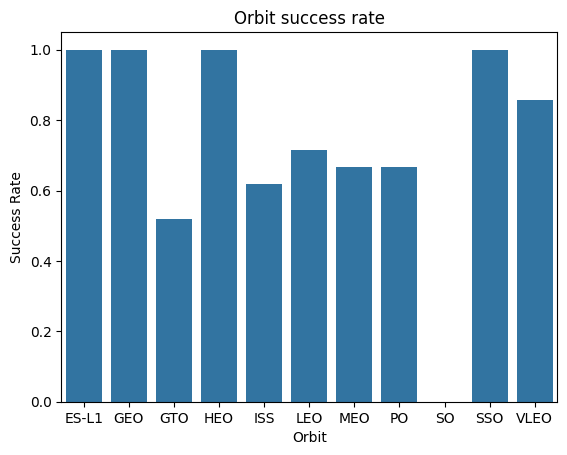

In [43]:
# Let's create a bar chart for the sucess rate of each orbit
orbit_success = df.groupby(['Orbit'])['Class'].mean()

sns.barplot(x=orbit_success.index, y=orbit_success.values)
plt.title('Orbit success rate')
plt.ylabel('Success Rate')
plt.xlabel('Orbit')
plt.show()

### TASK 4 - Visualize the relationship between FlightNumber and Orbit type

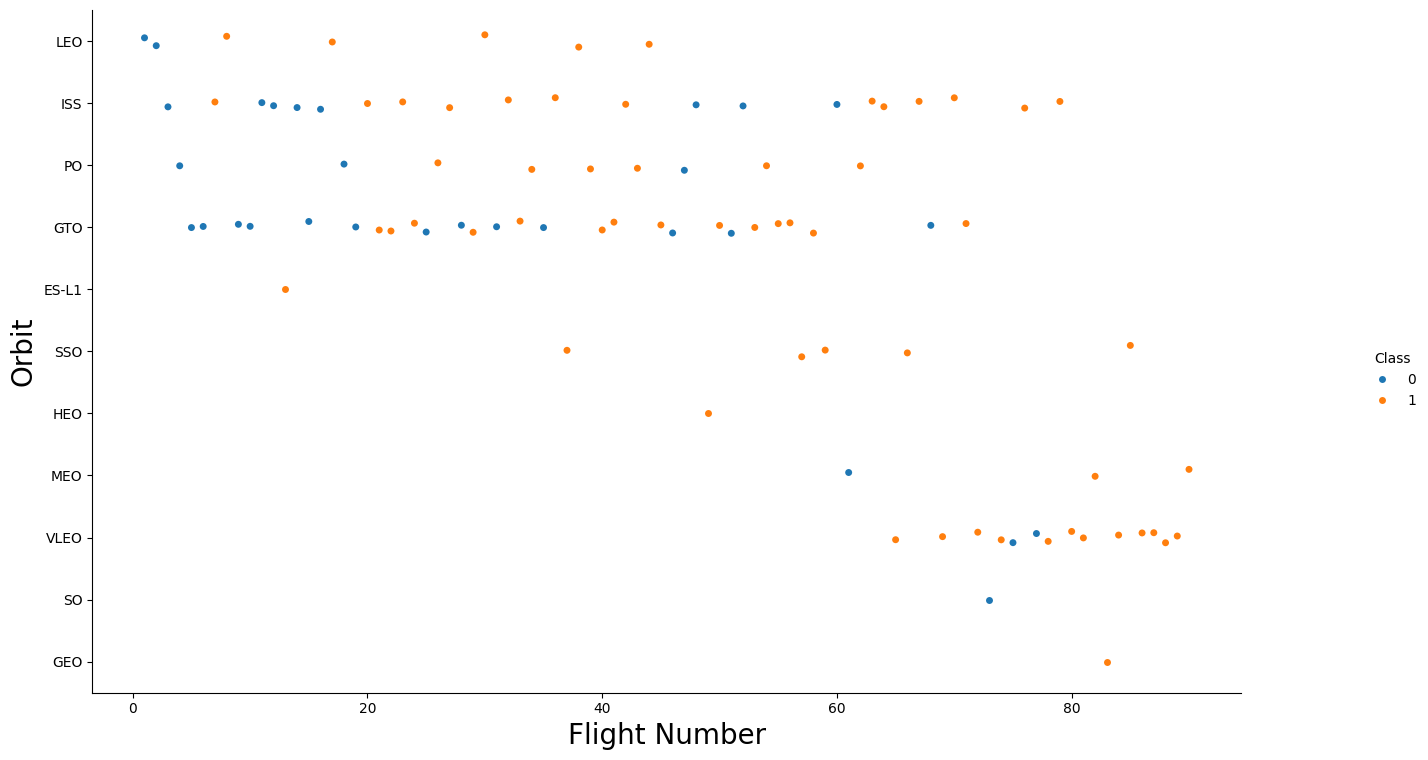

In [44]:
# For each orbit, we want to see if there is any relationship between FlightNumber and Orbit type.
sns.catplot(data=df, y='Orbit', x='FlightNumber', hue='Class')
plt.xlabel('Flight Number', fontsize=20)
plt.ylabel('Orbit', fontsize=20)
plt.gcf().set_size_inches(16, 8)
plt.show()

### TASK  5: Visualize the relationship between Payload and Orbit type

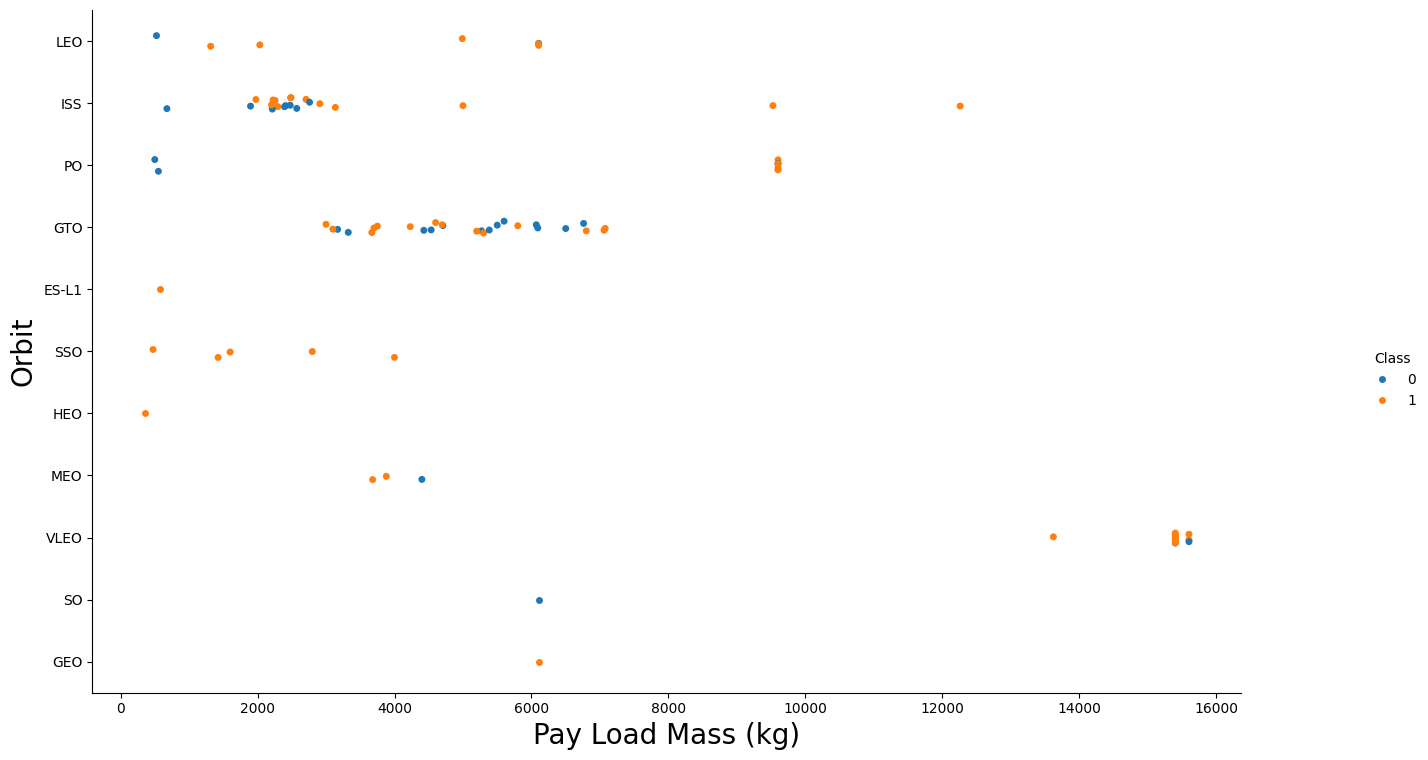

In [46]:
# Plot a scatter point chart with x axis to be Payload and y axis to be the Orbit, and hue to be the class value.
sns.catplot(data=df, y='Orbit', x='PayloadMass', hue='Class')
plt.xlabel('Pay Load Mass (kg)', fontsize=20)
plt.ylabel('Orbit', fontsize=20)
plt.gcf().set_size_inches(16, 8)
plt.show()

### TASK  6: Visualize the launch success yearly trend

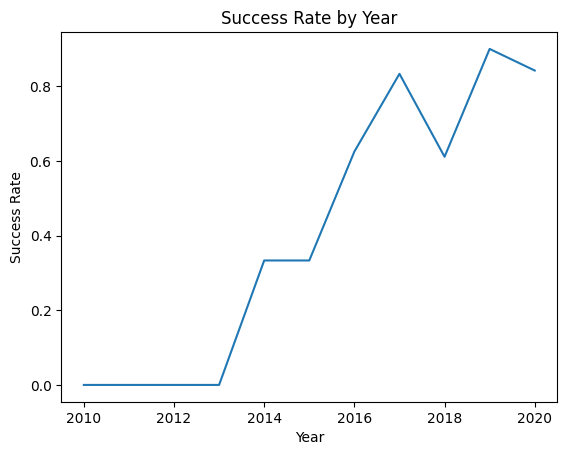

In [52]:
# You can plot a line chart with x axis to be Year and y axis to be average success rate,
# to get the average launch success trend.
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year

year_success_rate = df.groupby(['Year'])['Class'].mean()

plt.plot(year_success_rate)
plt.title('Success Rate by Year')
plt.xlabel('Year')
plt.ylabel('Success Rate')
plt.show()

## Feature Selection and Engineering

In [53]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]

### TASK  7: Create dummy variables to categorical columns

In [68]:
# Use the function get_dummies and features dataframe to apply OneHotEncoder to the column Orbits, LaunchSite, LandingPad, and Serial.
# Assign the value to the variable features_one_hot, display the results using the method head.
# Your result dataframe must include all features including the encoded ones.
features_one_hot = pd.get_dummies(features, columns=['Orbit', 'LaunchSite', 'LandingPad', 'Serial'])
features_one_hot.head()

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1,6104.959412,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2,525.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3,677.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
3,4,500.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
4,5,3170.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False


### TASK  8: Cast all numeric columns to float64

In [57]:
features.dtypes

FlightNumber               int64
Date              datetime64[ns]
BoosterVersion            object
PayloadMass              float64
Orbit                     object
LaunchSite                object
Outcome                   object
Flights                    int64
GridFins                    bool
Reused                      bool
Legs                        bool
LandingPad                object
Block                    float64
ReusedCount                int64
Serial                    object
Longitude                float64
Latitude                 float64
Class                      int64
Year                       int32
dtype: object

In [69]:
features_one_hot[['FlightNumber', 'Flights','ReusedCount']] = features_one_hot[['FlightNumber', 'Flights','ReusedCount']].astype('float64')
features_one_hot.head()

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1.0,6104.959412,1.0,False,False,False,1.0,0.0,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2.0,525.000000,1.0,False,False,False,1.0,0.0,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3.0,677.000000,1.0,False,False,False,1.0,0.0,False,False,...,False,False,False,False,False,False,False,False,False,False
3,4.0,500.000000,1.0,False,False,False,1.0,0.0,False,False,...,False,False,False,False,False,False,False,False,False,False
4,5.0,3170.000000,1.0,False,False,False,1.0,0.0,False,False,...,False,False,False,False,False,False,False,False,False,False


In [70]:
features_one_hot.to_csv('dataset_part_3.csv', index=False)